In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree as t
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/heart.csv")

In [3]:
categoricalCols = df.select_dtypes("object").columns
categoricalCols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

We replace the following categorical variables into numbers:
1. Sex: Sex of the patient [M: Male, F: Female]
2. ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
3. RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
4. ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
5. ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

In [4]:
df.Sex = df.Sex.replace({"M": 0, "F": 1})
df.ChestPainType = df.ChestPainType.replace({"ATA": 0, "TA": 1, "ASY":2, "NAP":3})
df.RestingECG = df.RestingECG.replace({"Normal": 0, "ST": 1, "LVH":2})
df.ExerciseAngina = df.ExerciseAngina.replace({"Y": 0, "N": 1})
df.ST_Slope = df.ST_Slope.replace({"Up": 0, "Down": 1, "Flat": 2})

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,1,0.0,0,0
1,49,1,3,160,180,0,0,156,1,1.0,2,1
2,37,0,0,130,283,0,1,98,1,0.0,0,0
3,48,1,2,138,214,0,0,108,0,1.5,2,1
4,54,0,3,150,195,0,0,122,1,0.0,0,0


In [6]:
categoricalCols = df.select_dtypes("object").columns
categoricalCols

Index([], dtype='object')

# Basic Decision Trees

In [28]:
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, df["HeartDisease"], test_size=0.2, random_state=1)

In [30]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [31]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       336
           1       1.00      1.00      1.00       398

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76        74
           1       0.89      0.72      0.79       110

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.78      0.78       184



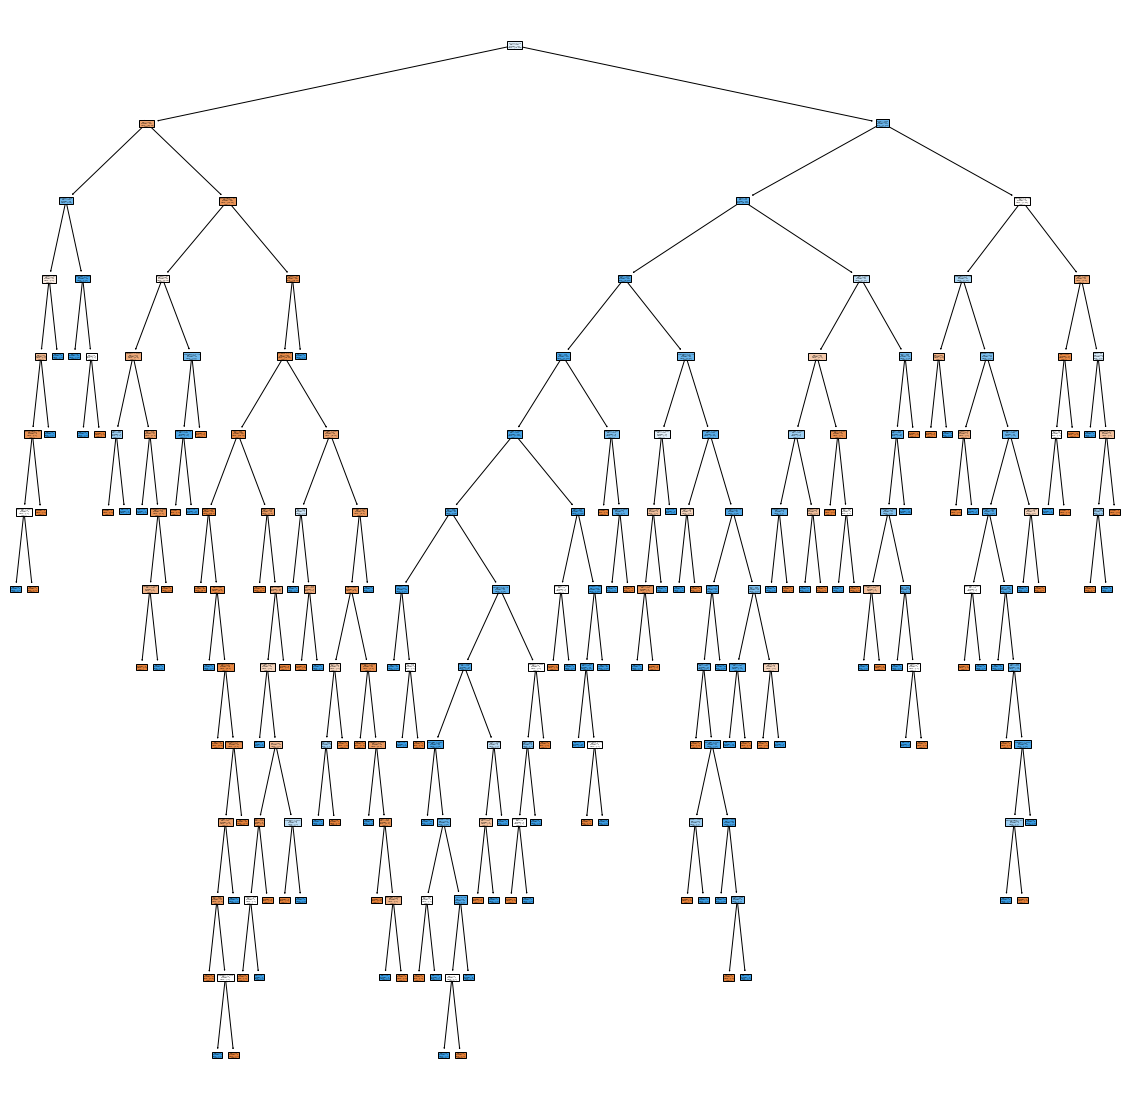

In [33]:
plt.figure(figsize=(20,20))
t.plot_tree(tree,feature_names=df.columns,class_names=list(str(df.HeartDisease.unique())),filled=True)
plt.show()

# Pre-prunning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {'max_depth': [2,4,5,6,8,10],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2]}

tree = DecisionTreeClassifier(random_state=0)
gcv = GridSearchCV(estimator=tree,param_grid=params)
gcv.fit(X_train, y_train)

model = gcv.best_estimator_

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       336
           1       0.90      0.92      0.91       398

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734



In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        74
           1       0.90      0.87      0.88       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



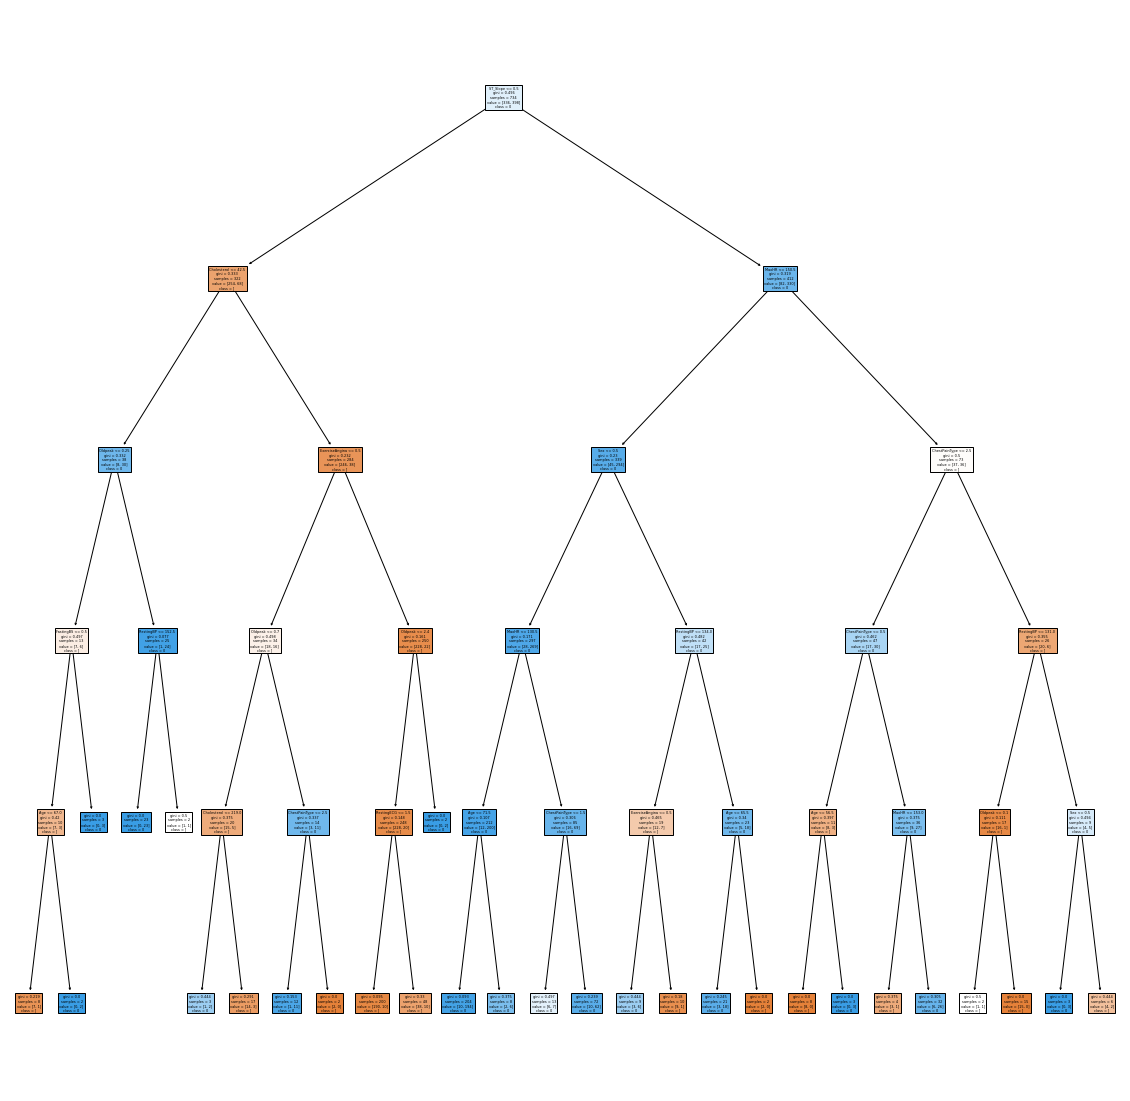

In [39]:
plt.figure(figsize=(20,20))
t.plot_tree(model,feature_names=df.columns,class_names=list(str(df.HeartDisease.unique())),filled=True)
plt.show()

# Cross-Validation

## Inner Working of Cross Validation 

- Shuffle the dataset in order to remove any kind of order
- Split the data into K number of folds. K= 5 or 10 will work for most of the cases.
- Now keep one fold for testing and remaining all the folds for training.
- Train (fit) the model on train set and test (evaluate) it on test set and note down the results for that split
- Now repeat this process for all the folds, every time choosing separate fold as test data
- So for every iteration our model gets trained and tested on different sets of data
- At the end sum up the scores from each split and get the mean score

## K Fold Cross-Validation

In [40]:
from sklearn.model_selection import cross_val_score

In [53]:
tree = DecisionTreeClassifier(random_state=0, min_samples_split = 5, min_samples_leaf = 2, max_depth = 8)
scores = cross_val_score(tree, X, y, cv = 5)
scores

array([0.82065217, 0.77173913, 0.80978261, 0.76502732, 0.69945355])

In [54]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.09)
